In [34]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import string
import io
import xlrd as xl
from pandas import ExcelWriter

In [83]:
#Input file
file = open(r'C:\Users\svam\Downloads\Affiliate on-boarding process validation_AutoGeneratedCaption.txt','r', encoding="utf8")

#Transcript file from TEAMS can be cleaned from the below link
#https://web.microsoftstream.com/VTTCleaner/CleanVTT.html

In [84]:
#read file to string
messages = file.read()

In [53]:
#text_df.to_excel(r'C:\Users\svam\Documents\text.xlsx',sheet_name='text')

In [62]:
type(messages)

str

In [63]:
len(messages)

30859

In [86]:
#removing puncutations
messages = re.sub(r'[^\w\s]','',messages)

In [87]:
#tokeninzing the sentences
lines=tokenize.sent_tokenize(messages)
len(lines)

1

In [89]:
#tokeninzing the words
words=tokenize.word_tokenize(messages)
len(words)

5777

In [66]:
type(words)

list

In [91]:
#performing stemming and lemmatizing
ps = PorterStemmer()

stem_words=[]
for word in words:
    root_word= ps.stem(word)
    stem_words.append(root_word)

#print(stem_words)


wml = WordNetLemmatizer()

lemma_words=[]
for word in words:
    tokens = wml.lemmatize(word)
    lemma_words.append(tokens)

In [97]:
#removing stop words from the lemmatized list of words
Stop_words = stopwords.words('english')
filter_words = []

for w in lemma_words:
    if w not in Stop_words:
         filter_words.append(w)

print("Total words after removing stop-words-",len(lemma_words))
print("Total words after removing stop-words-",len(filter_words))
#print(filter_words)

Total words after removing stop-words- 5777
Total words after removing stop-words- 3185


In [93]:
filter_words

['So',
 'bonkers',
 'trying',
 'least',
 'high',
 'level',
 'whatever',
 'could',
 'remember',
 'change',
 'done',
 'code',
 'So',
 'putting',
 'And',
 'also',
 'I',
 'mean',
 'say',
 'high',
 'level',
 'thing',
 'I',
 'least',
 'part',
 'I',
 'think',
 'I',
 'kind',
 'remember',
 'whatever',
 'change',
 'Ive',
 'done',
 'So',
 'I',
 'I',
 'mean',
 'I',
 'similarly',
 'asked',
 'whether',
 'modification',
 'I',
 'mean',
 'documentation',
 'thing',
 'send',
 'Probably',
 'must',
 'thing',
 'But',
 'yeah',
 'couldnt',
 'unfortunately',
 'health',
 'issue',
 'couldnt',
 'join',
 'Yeah',
 'OK',
 'let',
 'start',
 'customer',
 'Yeah',
 'OK',
 'let',
 'start',
 'customer',
 'So',
 'customer',
 'I',
 'mean',
 'hedge',
 'cool',
 'kind',
 'straightforward',
 'add',
 'new',
 'update',
 'whatever',
 'going',
 'board',
 'thats',
 'alright',
 'She',
 'Im',
 'Im',
 'sure',
 'Im',
 'actually',
 'helping',
 'Problem',
 'indoor',
 'Once',
 'even',
 'I',
 'cant',
 'hear',
 'voice',
 'properly',
 'Hello'

In [94]:
top_N = 100

#final_words = filter_words.tolist()  # this is a list of lists
#final_words = [word for list in filter_words for word in list]

# frequency distribution
word_dist = nltk.FreqDist(filter_words)

rslt_df = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])

In [95]:
rslt_df.head(50)

,Word,Frequency
0,I,170
1,OK,149
2,So,84
3,know,73
4,think,54
5,right,54
6,plan,42
7,Yeah,40
8,mean,39
9,product,37


Top 20 words in conversations:

               Word  Frequency
0                I        170
1               OK        149
2               So         84
3             know         73
4            think         54
5            right         54
6             plan         42
7             Yeah         40
8             mean         39
9          product         37
10        activity         35
11           thing         34
12            data         34
13             one         33
14           thats         32
15       basically         32
16            code         30
17  transformation         30
18            need         30
19             say         28


Text(0.5, 1.0, 'Distribution of Key Words')

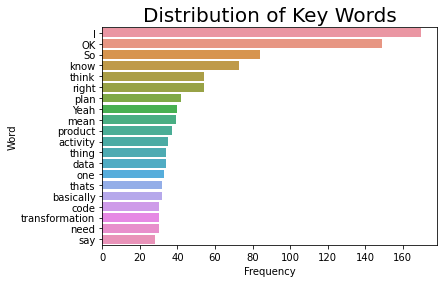

In [96]:
x = rslt_df.nlargest( columns = 'Frequency', n = 20 )
print( 'Top 20 words in conversations:\n\n', x )
ax = sns.barplot( x = 'Frequency', y = x.Word, data = x )
ax.set_title( "Distribution of Key Words", fontsize = '20')